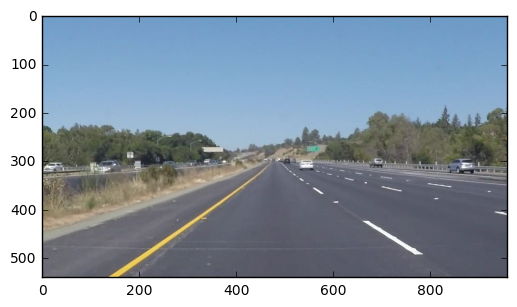

w, h = 960 540


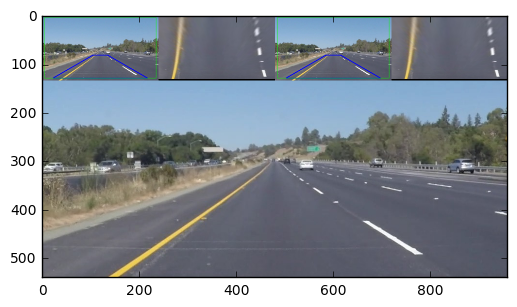

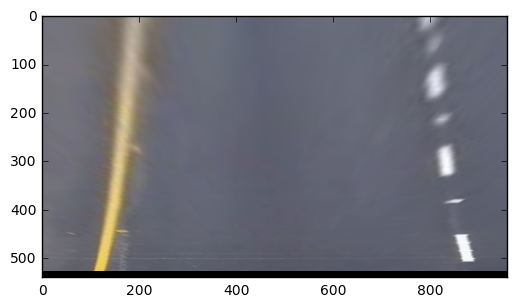

In [55]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# From Slack to test
def show(*images,title=None):
    f, axes = plt.subplots(1,len(images), squeeze=False)
    f.set_size_inches((6 * len(images),8))
    if title and len(images)==1 and type(title) == str:
        title = [title]
    for i in range(len(images)):
        img = images[i]
        ax = axes[0][i]
        if title is not None:
            assert len(title) == len(images)
            t = title[i]
            ax.text(0.5, 1.05, t, transform=ax.transAxes, fontsize=14, verticalalignment='bottom', horizontalalignment='center')
        if len(img.shape) == 3:
            ax.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
        else:
            ax.imshow(img, cmap="gray")

img = cv2.imread('test_images/solidYellowLeft.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Original Image
plt.imshow(img)
plt.show()


# Frame size
w, h = img.shape[1], img.shape[0]
print('w, h =', w, h)

bottomW = w - 180
topW = 120
topH = h//2 + 60
bottomH = h - 20

# Perspective Transform
PARAMS_DELTA_LEFT_BOTTOM = (120, -20) # (130, 60) (160, -20)
PARAMS_DELTA_LEFT_UP = (-145, 120) # (-10, 30) (-130, 120)
PARAMS_DELTA_RIGHT_UP = (170, 120) # (10, 30) (120, 120)
PARAMS_DELTA_RIGHT_BOTTOM = (-60, -20) # (-80, -60) (-60, -20)
region_deltas = [PARAMS_DELTA_LEFT_BOTTOM, PARAMS_DELTA_LEFT_UP, PARAMS_DELTA_RIGHT_UP, PARAMS_DELTA_RIGHT_BOTTOM]

# region_vertices1 = np.array([[(0      + region_deltas[0][0], h    + region_deltas[0][1]),
#                      (w//2 + region_deltas[1][0], h//2 + region_deltas[1][1]),
#                      (w//2 + region_deltas[2][0], h//2 + region_deltas[2][1]),
#                      (w    + region_deltas[3][0], h    + region_deltas[3][1])]])

region_vertices = np.array([[((w - bottomW) // 2, bottomH),
                             ((w - topW) // 2, topH),
                             ((w + topW) // 2, topH),
                             ((w + bottomW) // 2, bottomH)]])

# print('reg.shape1 =', region_vertices1.shape)
# print('reg1 =', region_vertices1)
# print('reg.shape2 =', region_vertices2.shape)
# print('reg2 =', region_vertices2)

dest_vertices = np.array([[region_vertices[0][0],
                (region_vertices[0][0][0],region_vertices[0][1][1]),
                (region_vertices[0][3][0],region_vertices[0][2][1]),
                region_vertices[0][3]]])
offsetH = 20
offsetW = 20
dest_vertices = np.array([[(offsetW, h - offsetH),
                (offsetW, offsetH),
                (w - offsetW, offsetH),
                (w - offsetW, h - offsetH)]])
#         if sampled:
#             print('region_vertices =', region_vertices)
#             print('dest_vertices =', dest_vertices)

img1 = np.copy(img)
cv2.polylines(img1, region_vertices, True, (0, 0, 255), 5)    
cv2.polylines(img1, dest_vertices, True, (0, 255, 0), 2)


def compose_images(dst, src, nrows, ncols, num):
    assert 0 < num <= nrows * ncols
    if nrows > ncols:
        newH = int(dst.shape[0]/nrows)
        dim = (int(dst.shape[1] * newH/dst.shape[0]), newH)
    else:
        newW = int(dst.shape[1]/ncols)
        dim = (newW, int(dst.shape[0] * newW/dst.shape[1]))
    img = cv2.resize(src, dim, interpolation = cv2.INTER_AREA)
    nr = (num - 1) // ncols
    nc = (num - 1) % ncols
    dst[nr * img.shape[0]:(nr + 1) * img.shape[0], nc * img.shape[1]:(nc + 1) * img.shape[1]] = img
    return dst
    

# Resize image
# newH = int(h/4)
# dim = (int(w * (newH/h)), newH)
# print('dim =', dim)
# img1 = cv2.resize(img1, dim, interpolation = cv2.INTER_AREA)
# print('img1.shape =', img1.shape)

# First image place
# img[0:img1.shape[0],0:img1.shape[1]] = img1

compose_images(img, img1, 4, 4, 1)

# print('img.shape =', img.shape)

M = cv2.getPerspectiveTransform(np.float32(region_vertices), np.float32(dest_vertices))
img2 = cv2.warpPerspective(img, M, (w,h), flags=cv2.INTER_LINEAR)

compose_images(img, img2, 4, 4, 2)

'''
# Resize image 2
# newH = int(h/3)
dim = (int(w * (newH/h)), newH)
print('dim =', dim)
img2 = cv2.resize(img2, dim, interpolation = cv2.INTER_AREA)
print('img2.shape =', img2.shape)

# Second image place
img[0:img2.shape[0],img1.shape[1]:img1.shape[1] + img2.shape[1]] = img2
'''

'''
# Resize image 3
# newH = int(h/3)
dim = (int(w * (newH/h)), newH)
print('dim =', dim)
img3 = cv2.resize(img1, dim, interpolation = cv2.INTER_AREA)
print('img3.shape =', img3.shape)

# Third image place
img[0:img3.shape[0],img1.shape[1]+img2.shape[1]:img1.shape[1] + img2.shape[1] + img3.shape[1]] = img3
'''

compose_images(img, img1, 4, 4, 3)

compose_images(img, img2, 4, 4, 4)

plt.imshow(img)
plt.show()


plt.imshow(img2)
plt.show()


# cv2.imshow("original", img)
# cv2.waitKey(500)
# cv2.destroyAllWindows()

In [2]:
# cv2.destroyAllWindows()